In [6]:
import pandas as pd
df_train=pd.read_csv("Week7_train.csv")
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.shape

(42000, 785)

In [8]:
df_train_sample=df_train.sample(frac=0.10)

In [9]:
df_train_sample.shape

(4200, 785)

In [10]:
df_train_sample.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
18665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30888,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11225,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3375,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_train_sample['label'].unique()

array([0, 8, 7, 1, 2, 3, 9, 6, 4, 5])

In [12]:
df_train_sample.count()

label       4200
pixel0      4200
pixel1      4200
pixel2      4200
pixel3      4200
            ... 
pixel779    4200
pixel780    4200
pixel781    4200
pixel782    4200
pixel783    4200
Length: 785, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

x=df_train_sample.drop(columns=['label'])
y=df_train_sample['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

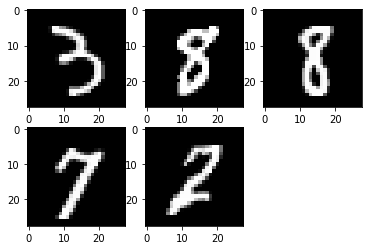

In [27]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test.iloc[i].values.reshape(28,28),cmap='gray')
plt.show()

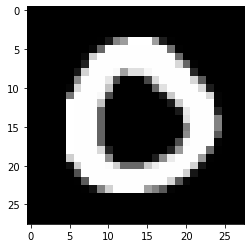

In [42]:
plt.imshow(df_train.iloc[4,1:].values.reshape(28,28),cmap='gray')
plt.show()

In [46]:
model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
print(y_pred[:3])

[8 7 5]


In [47]:
model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(x_train,y_train)
y_val_pred=model.predict(x_test)
print(y_val_pred[:3])

[3 8 8]


In [51]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_val_pred)
cr=classification_report(y_test,y_val_pred)
accuracy=accuracy_score(y_test,y_val_pred)
print(cm,"\n")
print(cr)
print(accuracy)

[[129   0   0   0   0   0   0   1   0   0]
 [  0 137   0   0   0   0   0   0   0   0]
 [  1   5 117   2   1   0   1   3   0   0]
 [  0   1   0 122   0   1   0   1   4   0]
 [  0   4   0   0 117   0   2   0   0  10]
 [  0   5   0   8   1 111   1   0   0   3]
 [  2   1   0   0   0   1 111   0   0   0]
 [  0   7   0   1   1   0   0 123   0   2]
 [  0   2   0   5   0   5   0   1  79   0]
 [  2   2   0   1   7   0   0   7   0 112]] 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       130
           1       0.84      1.00      0.91       137
           2       1.00      0.90      0.95       130
           3       0.88      0.95      0.91       129
           4       0.92      0.88      0.90       133
           5       0.94      0.86      0.90       129
           6       0.97      0.97      0.97       115
           7       0.90      0.92      0.91       134
           8       0.95      0.86      0.90        92
           9       0.88   

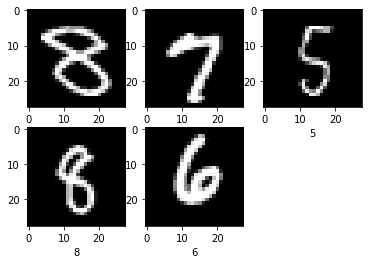

In [57]:
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train.iloc[i].values.reshape(28,28),cmap="gray")
    plt.xlabel(y_train.iloc[i])
plt.show()